<a href="https://colab.research.google.com/github/leopoljuleskolie/MPA-MLF/blob/main/LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA through Singular Value Decomposition

In [8]:
import numpy as np

# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0], [4, 3, 0]])

# Calculate the covariance matrix:
R = np.cov(X)

# Calculate the SVD decomposition and new basis vectors:
[U, D, V] = np.linalg.svd(R)  # call SVD decomposition
u1 = U[:, 0]  # new basis vector
u2 = U[:, 1]  # new basis vector

# Calculate the coordinates in the new orthonormal basis:
Xi = np.dot(U.T, X)

# Calculate the approximation of the original from the new basis:
X_approx = np.dot(U, Xi)

# Test adding a second dimension to array
# print(Xi1[:, None])

# Check that you got the original
print("Original Data:")
print(X)
print("\nApproximated Data:")
print(X_approx)


Original Data:
[[2 1 0]
 [4 3 0]]

Approximated Data:
[[2. 1. 0.]
 [4. 3. 0.]]


PCA on Iris data

In [9]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

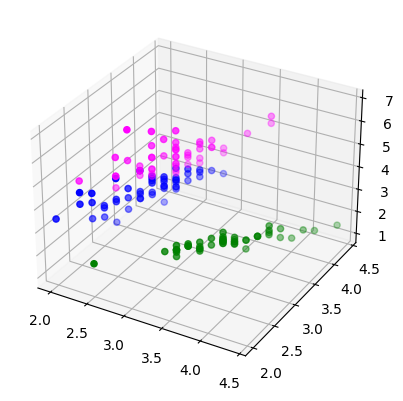

In [10]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


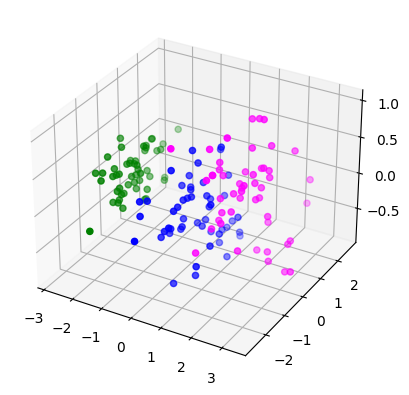

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Add import statement for PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

# Define PCA object (three components), fit and transform the data
pca = PCA(n_components=3)  # Corrected import statement
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())

# You can plot the transformed feature space in 3D:
fig = plt.figure()
axes2 = fig.add_subplot(111, projection='3d')
axes2.scatter3D(Xpca[y == 0, 0], Xpca[y == 0, 1], Xpca[y == 0, 2], color='green')
axes2.scatter3D(Xpca[y == 1, 0], Xpca[y == 1, 1], Xpca[y == 1, 2], color='blue')
axes2.scatter3D(Xpca[y == 2, 0], Xpca[y == 2, 1], Xpca[y == 2, 2], color='magenta')
plt.show()


In [13]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [14]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

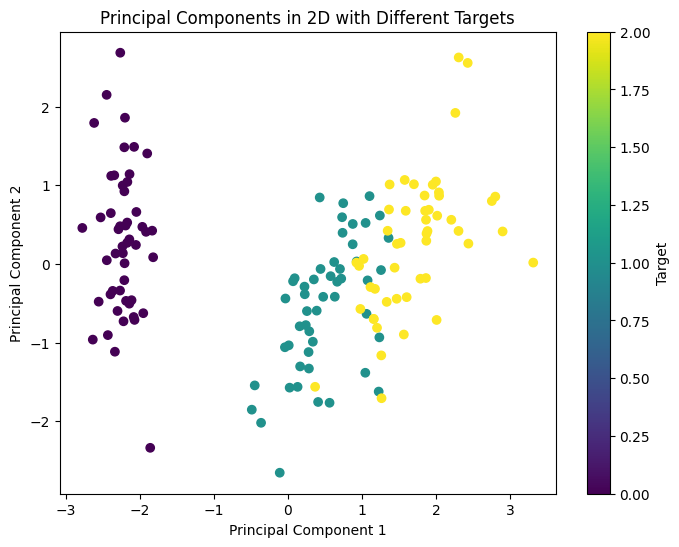

In [16]:
# Plot the principal components in 2D, mark different targets in color
plt.figure(figsize=(8, 6))
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components in 2D with Different Targets')
plt.colorbar(label='Target')
plt.show()

KNN classifier

(120, 4)
(30, 4)


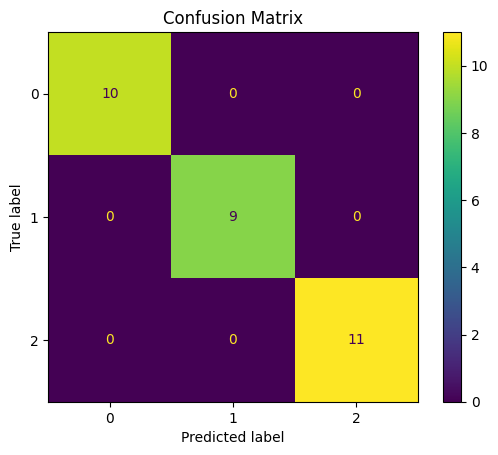

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print(X_train.shape)  #
print(X_test.shape)

# Initialize and train the KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn1.predict(X_test)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn1.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


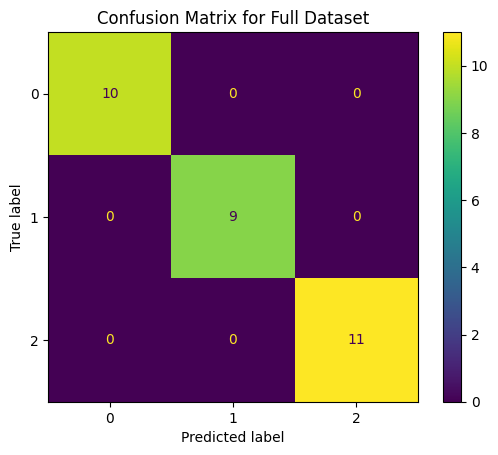

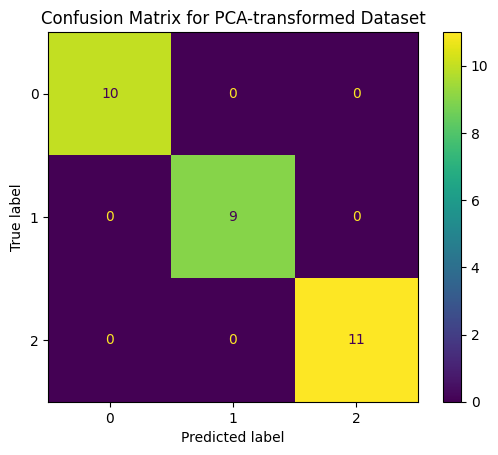

Confusion Matrix for Full Dataset:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix for PCA-transformed Dataset:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Step 1: Split the original dataset into training and testing sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a KNN classifier on the full 4-dimensional dataset
knn_full = KNeighborsClassifier(n_neighbors=3)
knn_full.fit(X_train_full, y_train)

# Step 3: Calculate and display the confusion matrix for the full dataset
y_pred_full = knn_full.predict(X_test_full)
cm_full = confusion_matrix(y_test, y_pred_full)
disp_full = ConfusionMatrixDisplay(confusion_matrix=cm_full, display_labels=knn_full.classes_)
disp_full.plot()
plt.title('Confusion Matrix for Full Dataset')
plt.show()

# Step 4: Perform PCA on the original dataset to obtain the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 5: Split the PCA-transformed dataset into training and testing sets
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Train a KNN classifier on the PCA-transformed dataset
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Step 7: Calculate and display the confusion matrix for the PCA-transformed dataset
y_pred_pca = knn_pca.predict(X_test_pca)
cm_pca = confusion_matrix(y_test, y_pred_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=knn_pca.classes_)
disp_pca.plot()
plt.title('Confusion Matrix for PCA-transformed Dataset')
plt.show()

# Step 8: Compare the confusion matrices and assess the performance of the classifier
print("Confusion Matrix for Full Dataset:")
print(cm_full)
print("\nConfusion Matrix for PCA-transformed Dataset:")
print(cm_pca)



